## **Importa bibliotecas**

In [ ]:
import numpy as np
import statistics
from scipy import stats
import math

## **Carrega o Conjunto de Dados (dataset)**


In [ ]:
dados = np.array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
                  157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
                  163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
                  173])

# **Medidas de Tendência Central**
Valor de um conjunto de dados (dataset) que representa uma entrada típica ou central

## **Média Aritmética Simples**

In [ ]:
#calculando média manualmente
dados.sum() / len(dados)

In [ ]:
#calculando a média usando função do NumPy
dados.mean()

In [ ]:
#calculando a média usando pacote "statistics" do Python
statistics.mean(dados)

## **Moda**

In [ ]:
#calculando a moda usando pacote "statistics" do Python
statistics.mode(dados)

In [ ]:
#calculando a moda usando pacote "stats" do ScyPy
stats.mode(dados)

## **Mediana**

In [ ]:
#número de elementos no dataset é ímpar
#os dados devem estar ordenados
dados_impar = [150, 151, 152, 152, 153, 154, 155, 155, 155]

***Mediana - Cálculo manual (número ímpar de elementos)***

In [ ]:
posicao = len(dados_impar) / 2
posicao

In [ ]:
#arredonda para cima
posicao = math.ceil(posicao)
posicao

In [ ]:
#subtrai 1 de posicao porque o índice inicia em zero (0)
dados_impar[posicao - 1]

***Mediana - Cálculo manual (número par de elementos)***

In [ ]:
#calcula número de elementos do dataset
len(dados)

In [ ]:
#calcula a divisão inteira (//)
posicao = len(dados) // 2
posicao

In [ ]:
#índice inicia em 0, por isto subtrai
#com isto se obtém os dois elmentos centrais do dataset
dados[posicao - 1], dados[posicao]

In [ ]:
#mediana é a média aritmética dos dois elementos centrais
mediana = (dados[posicao - 1] + dados[posicao]) / 2
mediana

**Mediana - cálculo com as bibliotecas**

In [ ]:
np.median(dados_impar)

In [ ]:
np.median(dados)

In [ ]:
statistics.median(dados_impar)

In [ ]:
statistics.median(dados)

## **Média aritmética ponderada**

In [ ]:
notas = np.array([9, 8, 7, 3])
pesos = np.array([1, 2, 3, 4])

In [ ]:
(9 * 1 + 8 * 2 + 7 * 3 + 3 * 4) / (1 + 2 + 3 + 4)

In [ ]:
media_ponderada = (notas * pesos).sum() / pesos.sum()
media_ponderada

In [ ]:
np.average(notas, weights=pesos)

## **Média aritmética, moda e mediana de uma distribuição de frequência (DF)**

In [ ]:
#dicionário com intervalos inferior e superior (i.e. classes)
#fi = frequência absoluta
dados = {'inferior': [150, 154, 158, 162, 166, 170],
         'superior': [154, 158, 162, 166, 170, 174],
         'fi': [5, 9, 11, 7, 5, 3]}

In [ ]:
#importa biblioteca Pandas
#converte o dataset em um DataFrame do Pandas
import pandas as pd
dataset = pd.DataFrame(dados)
dataset

In [ ]:
#calcula "xi" que é o Ponto Médio dos intervalos
#e acrescenta esta coluna no DataFrame
dataset['xi'] = (dataset['superior'] + dataset['inferior']) / 2
dataset

In [ ]:
#calcula "fi.xi" que é o produto da frequência absoluta com o ponto médio
#e acrescenta este produto como uma coluna no DataFrame
dataset['fi.xi'] = dataset['fi'] * dataset['xi']
dataset

In [ ]:
#cria uma coluna para frequência acumulada ('Fi')
# e inicializa os valores dela com zero (0)
dataset['Fi'] = 0
dataset

In [ ]:
#calcula a frequência acumulada
frequencia_acumulada = []
somatorio = 0
for linha in dataset.iterrows():
  #print(linha[1])  #imprime a linha do DataFrame
  #print(linha[1][2])  #imprime a coluna "fi" do Data Frame
  #acumula o valor da "fi"
  somatorio += linha[1][2]
  frequencia_acumulada.append(somatorio)

In [ ]:
frequencia_acumulada

In [ ]:
#acrescenta a lista acima como uma coluna ("Fi") no DataFrame
dataset['Fi'] = frequencia_acumulada
dataset

**Média da Distribuição de Frequência**

In [ ]:
#calcula os totais das colunas "fi" e "fi.xi"
dataset['fi'].sum(), dataset['fi.xi'].sum()

In [ ]:
#calcula a média da distribuição de frequência
dataset['fi.xi'].sum() / dataset['fi'].sum()

**Moda da Distribuição de Frequência**

In [ ]:
#calcula a moda da DF
#é o valor da frequência ("fi"") que mais se repete
dataset['fi'].max()

In [ ]:
#usa um filtro para obter a linha da "fi" que mais se repete
dataset[dataset['fi'] == dataset['fi'].max()]

In [ ]:
#usa um filtro para obter o valor de "xi"
dataset[dataset['fi'] == dataset['fi'].max()]['xi'].values[0]

**Mediana da Distribuição de Frequência**

In [ ]:
dataset

In [ ]:
fi_2 = dataset['fi'].sum() / 2
fi_2

In [ ]:
limite_inferior, frequencia_classe, id_frequencia_anterior = 0, 0, 0
for linha in dataset.iterrows():
  #print(linha)
  limite_inferior = linha[1][0]
  frequencia_classe = linha[1][2]
  id_frequencia_anterior = linha[0]
  if linha[1][5] >= fi_2:
    id_frequencia_anterior -= 1
    break

In [ ]:
limite_inferior, frequencia_classe, id_frequencia_anterior

In [ ]:
Fi_anterior = dataset.iloc[[id_frequencia_anterior]]['Fi'].values[0]
Fi_anterior

In [ ]:
#md = li + ((∑fi/2 - Fiant) * LC) / fi
#md = mediana
#li = limite inferior do intervalo
#∑fi/2 = ponto médio de uma classe (intervalo)
#Fiant = frequência acumulada da classe anterior
#LC = largura da classe (no caso = 4)
#fi = frequência absoluta da classe
mediana = limite_inferior + ((fi_2 - Fi_anterior) * 4) / frequencia_classe
mediana

**Função completa**

In [ ]:
#função para calcular todos os passos manuais acima
def get_estatisticas(dataframe):
  media = dataset['fi.xi'].sum() / dataset['fi'].sum()
  moda = dataset[dataset['fi'] == dataset['fi'].max()]['xi'].values[0]

  fi_2 = dataset['fi'].sum() / 2
  limite_inferior, frequencia_classe, id_frequencia_anterior = 0, 0, 0
  for i, linha in enumerate(dataset.iterrows()):
    limite_inferior = linha[1][0]
    frequencia_classe = linha[1][2]
    id_frequencia_anterior = linha[0]
    if linha[1][5] >= fi_2:
      id_frequencia_anterior -= 1
      break
  Fi_anterior = dataset.iloc[[id_frequencia_anterior]]['Fi'].values[0]
  mediana = limite_inferior + ((fi_2 - Fi_anterior) * 4) / frequencia_classe

  #retorna a média, a moda e a mediana
  return media, moda, mediana

In [ ]:
#chama a função passando o dataset para efetuar os cálculos
get_estatisticas(dataset)

# **Medidas de Variação**
Indicam o quanto os dados se apresentam dispersos (espalhados) em torno da região central. Elas mostram o grau de variação existente no dataset. Mais usadas: Amplitude Total, Desvio Padrão e Variância

## **Amplitude Total**

In [ ]:
dados = np.array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
                  157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
                  163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
                  173])
dados

In [ ]:
#calcula a Amplitude Total
dados.max() - dados.min()

## **Desvio, Variância, Desvio Padrão e Coeficiente de Variação**

In [ ]:
#vamos usar um dataset menor
dados_impar = np.array([150, 151, 152, 152, 153, 154, 155, 155, 155])

**Cálculo manual**

In [ ]:
#calcula a média da população
media = dados_impar.sum() / len(dados_impar)
media

In [ ]:
#calcula o desvio (xi - média)
#é a diferença entre a entrada (xi) e a média do dataset
desvio = dados_impar - media
desvio

In [ ]:
#calcula os quadrados ((xi - média)**2) ou desvio**2
quadrados = desvio ** 2
quadrados

In [ ]:
#calcula a soma total dos quadrados (SSx)
soma_quadrados = quadrados.sum()
soma_quadrados

In [ ]:
#calcula a variância populacional
v = soma_quadrados / len(dados_impar)
v

In [ ]:
#calcula o desvio padrão populacional
#em inglês desvio padrão é chamado de "standard deviation"
dp = math.sqrt(v)
dp

In [ ]:
#calcula o coeficiente de variação (cv)
#CV de um conjunto de dados descreve o desvio padrão como uma porcentagem da média
cv = (dp / media) * 100
cv

In [ ]:
#função para efetuar todos os cálculos
def get_variancia_desvio_padrao_coeficiente(dataset):
  media = dataset.sum() / len(dataset)
  desvio = dados_impar - media
  quadrados = desvio ** 2
  soma_quadrados = quadrados.sum()
  variancia = soma_quadrados / len(dados_impar)
  dp = math.sqrt(variancia)
  return variancia, dp, (dp / media) * 100

In [ ]:
#chama a função passando o dataset para efetuar os cálcuos
get_variancia_desvio_padrao_coeficiente(dados_impar)

**Usando as Bibliotecas**

In [ ]:
np.var(dados_impar)

In [ ]:
np.std(dados_impar)

In [ ]:
np.var(dados)

In [ ]:
np.std(dados)

In [ ]:
statistics.variance(dados)

In [ ]:
statistics.stdev(dados)

In [ ]:
from scipy import ndimage
ndimage.variance(dados)

In [ ]:
stats.tstd(dados, ddof = 0)

In [ ]:
stats.variation(dados_impar) * 100

In [ ]:
stats.variation(dados) * 100

# **Medidas de Posição**
Descrevem a posição que um valor de dados específico possui em relação ao resto dos outros dados. Mais usadas: Quartis, Percentis e Decis



**Quartis**

São números que dividem um conjunto de dados ordenado em 4 partes iguais


*   Primeiro Quartil (Q1)
*   Segundo Quartil (Q2) (é a mediana do dataset)
*   Terceiro Quartil (Q3)




In [ ]:
dados_impar = [150, 151, 152, 152, 153, 154, 155, 155, 155]

### Cálculo manual

In [ ]:
#calcula a mediana do dataset que é o Q2
#Q2 divide o conjunto de dados em 2 metades
#Q1 e Q3 também são as medianas destas 2 metades, respectivamente
np.median(dados_impar)

In [ ]:
#calcula a posição da mediana (Q2)
#arredonda o valor para baixo (math.floor)
posicao_mediana = math.floor(len(dados_impar) / 2)
posicao_mediana

In [ ]:
esquerda = dados_impar[0:posicao_mediana]
esquerda

In [ ]:
#calcula o Q1
np.median(esquerda)

In [ ]:
direita = dados_impar[posicao_mediana + 1:]
direita

In [ ]:
#calcula o Q3
np.median(direita)

**Calculando Q1, Q2 e Q3 usando as Bibliotecas**

#### numpy

In [ ]:
#calcula Q2
np.quantile(dados_impar, 0.5)

In [ ]:
#calcula Q3
np.quantile(dados_impar, 0.75)

In [ ]:
#calcula Q1
#esta função inclui o valor 153, infelizmente
np.quantile(dados_impar, 0.25)

In [ ]:
#mostrar como o 153 está incluído no cálculo
esquerda2 = dados_impar[0:posicao_mediana + 1]
esquerda2

In [ ]:
np.median(esquerda2)

In [ ]:
#cálculando Q1, Q2 e Q3 sobre o dataset original (maior)
np.quantile(dados, 0.25), np.quantile(dados, 0.50), np.quantile(dados, 0.75)

#### scipy

In [ ]:
stats.scoreatpercentile(dados, 25), stats.scoreatpercentile(dados, 50), stats.scoreatpercentile(dados, 75)

#### pandas

In [ ]:
import pandas as pd
dataset = pd.DataFrame(dados)
dataset.head()

In [ ]:
#passa os valores em forma de lista
dataset.quantile([0.25, 0.5, 0.75])

In [ ]:
#função do Pandas que efetua o cálculo de todas as medidas
dataset.describe()

## **Amplitude Interquartil (AIQ)**

In [ ]:
dados

In [ ]:
#Calcula a Amplitude Total (AT)
dados.max() - dados.min()

In [ ]:
Q1 = np.quantile(dados, 0.25)
Q3 = np.quantile(dados, 0.75)
Q1, Q3

In [ ]:
#Significa que os valores do dataset na metade dele variam no máximo em 8.25
diferenca_interquartil = Q3 - Q1
diferenca_interquartil

## **Percentis**

Divide o conjunto de dados em 100 partes iguais

In [ ]:
np.median(dados)

In [ ]:
np.quantile(dados, 0.5)

In [ ]:
np.percentile(dados, 50)

In [ ]:
np.percentile(dados, 5), np.percentile(dados, 10), np.percentile(dados, 90)

In [ ]:
stats.scoreatpercentile(dados, 5), stats.scoreatpercentile(dados, 10), stats.scoreatpercentile(dados, 90)

In [ ]:
import pandas as pd
dataset = pd.DataFrame(dados)
dataset.head()

In [ ]:
dataset.quantile([0.05, 0.10, 0.90])

# **Desafio #1**

**Gerar estatísticas para o atributo "age" do dataset "census.csv"**



*   Carregue ("upload") o arquivo "census.csv"
*   Calcule a média, mediana e a moda
*   Compare os resultados



In [10]:
import pandas as pd
import numpy as np
import statistics as stat

In [2]:
census = pd.read_csv('census.csv')
census_sortido_por_idade = census.sort_values('age')
age = census_sortido_por_idade.loc[:,'age']

In [11]:
media = sum(age) / len(age)
mediana = np.median(age)
moda = stat.mode(age)

print(f'media: {media:.1f}\nmediana: {mediana:.1f}\nmoda: {moda:.1f}')

media: 38.6
mediana: 37.0
moda: 36.0


# **Desafio #2**

Desenhe o gráfico BoxPlot

<Axes: >

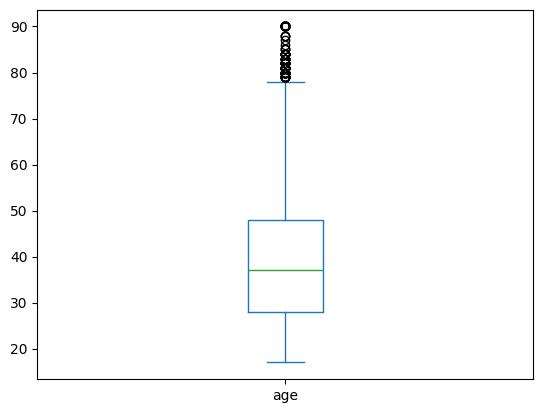

In [12]:
age.plot(kind='box')